In [ ]:
#Installing packages
!pip install mglearn
!pip install pydotplus
!pip install xgboost
!pip install graphviz
!pip install --upgrade tensorflow
! pip install --upgrade numpy

In [11]:
# Importing Packages
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import glob
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from mglearn.plot_helpers import cm2, cm3, discrete_scatter
from sklearn.tree._tree import TREE_LEAF
from IPython.display import display, Image
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.tree import _tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit,learning_curve
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [12]:
warnings.filterwarnings("ignore")

In [13]:
os.environ["PATH"] += os.pathsep + 'C:/Users/laksh/Anaconda3/Library/bin/' 

In [14]:
# Changing Directory
os.chdir("A:\Semester 2\Machine Learning\Dataset\Data")

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [16]:
def plot_learning_t_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Test score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [17]:
def graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(l_svc_fpr, l_svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, 
                                                                                                      linear_pred)))
    plt.plot(r_svc_fpr, r_svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, 
                                                                                                      RBF_pred)))
    plt.plot(p_svc_fpr, p_svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, 
                                                                                                      Poly_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y, tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y,tree_pred)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y,Knn_pred)))
    plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
         roc_auc_score(y,NN_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [18]:
def graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(l_svc_fpr, l_svc_tpr, label='Linear Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      linear_pred_test)))
    plt.plot(r_svc_fpr, r_svc_tpr, label='RBF Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      RBF_pred_test)))
    plt.plot(p_svc_fpr, p_svc_tpr, label='Poly Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                     Poly_pred_test)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                Decision_Tree_pred_test)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,XGboost_Decision_Tree_pred_test)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,Knn_pred_test)))
    plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,NN_pred_test)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )
    plt.legend()

# FaceBook Data Set

In [19]:
labels = np.array(['Page Popularity/likes','Page Checkins','Page talking about','Page Category',
'D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29',
'CC1','CC2','CC3','CC4','CC5','Base Time','Post Length','Post Share Count','Post Promotion Status','H Local',
'Post published weekday1','Post published weekday2','Post published weekday3','Post published weekday4','Post published weekday5','Post published weekday6','Post published weekday7',
'Base DateTime weekday1','Base DateTime weekday2','Base DateTime weekday3','Base DateTime weekday4','Base DateTime weekday5','Base DateTime weekday6','Base DateTime weekday7',
'Target Variable'])
len(labels)

54

In [20]:
# Merging the Data 
allFiles = glob.glob("A:\Semester 2\Machine Learning\Dataset\Data"+"/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None,names = labels)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True,sort=False)

# Preprocessing Data

In [21]:
elist=[]
for i in range(len(frame['Target Variable'])): 
    if frame['Target Variable'][i] >=  10:
        elist.append(1)
    else:
        elist.append(0)
frame['Target Variable']  = elist        

In [22]:
frame  = frame.loc[:,frame.columns != 'Post Promotion Status']

In [23]:
# Scaling the data
# compute the minimum value per feature on the training set
min_on_training = frame.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (frame - min_on_training).max(axis=0)

# subtract the min, and divide by range afterward, min=0 and max=1 for each feature
frame_scale = (frame - min_on_training) / range_on_training

In [24]:
# Checking whether dataset is balanced or not
print ('count of 1: {:.0f}' .format(len(frame_scale[frame_scale['Target Variable'] == 1])))
print ('count of 0: {:.0f}' .format(len(frame_scale[frame_scale['Target Variable'] == 0])))

count of 1: 5256
count of 0: 36693


Text(0.5, 1.0, 'Target variable Distributions \n (0: No Comments || 1: Comments)')

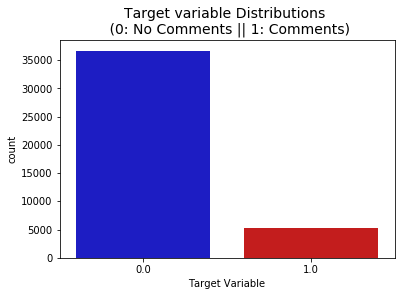

In [25]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Target Variable', data=frame_scale, palette=colors)
plt.title('Target variable Distributions \n (0: No Comments || 1: Comments)', fontsize=14)

In [26]:
# Since our Target Variables are highly skewed we should make them equivalent in order to have a normal distribution 
# of the Target Variables.

# Lets shuffle the data before creating the subsamples

df = frame_scale.sample(frac=1)

# amount of comments in Target Variable is 5256.
comment_df = df.loc[df['Target Variable'] == 1]
non_comment_df = df.loc[df['Target Variable'] == 0][:5256]

normal_distributed_df = pd.concat([comment_df, non_comment_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Page Popularity/likes,Page Checkins,Page talking about,Page Category,D5,D6,D7,D8,D9,D10,...,Post published weekday6,Post published weekday7,Base DateTime weekday1,Base DateTime weekday2,Base DateTime weekday3,Base DateTime weekday4,Base DateTime weekday5,Base DateTime weekday6,Base DateTime weekday7,Target Variable
6567,0.002921,0.000000,0.005249,0.076190,0.0,0.072078,0.014277,0.008543,0.034956,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21023,0.010218,0.000144,0.012886,0.076190,0.0,0.773618,0.084491,0.044639,0.346181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21833,0.003061,0.000000,0.022174,0.352381,0.0,0.505948,0.041768,0.023921,0.184002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19615,0.013099,0.000000,0.008003,0.219048,0.0,0.283415,0.040741,0.016660,0.120961,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41614,0.028816,0.000005,0.005182,0.180952,0.0,0.017145,0.006621,0.002777,0.018080,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Distribution of the Target Variable in the subsample dataset
0.0    0.5
1.0    0.5
Name: Target Variable, dtype: float64


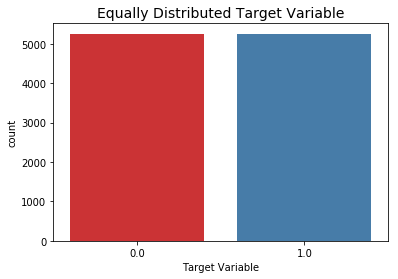

In [27]:
print('Distribution of the Target Variable in the subsample dataset')
print(new_df['Target Variable'].value_counts()/len(new_df))



sns.countplot('Target Variable', data=new_df, palette="Set1")
plt.title('Equally Distributed Target Variable', fontsize=14)
plt.show()

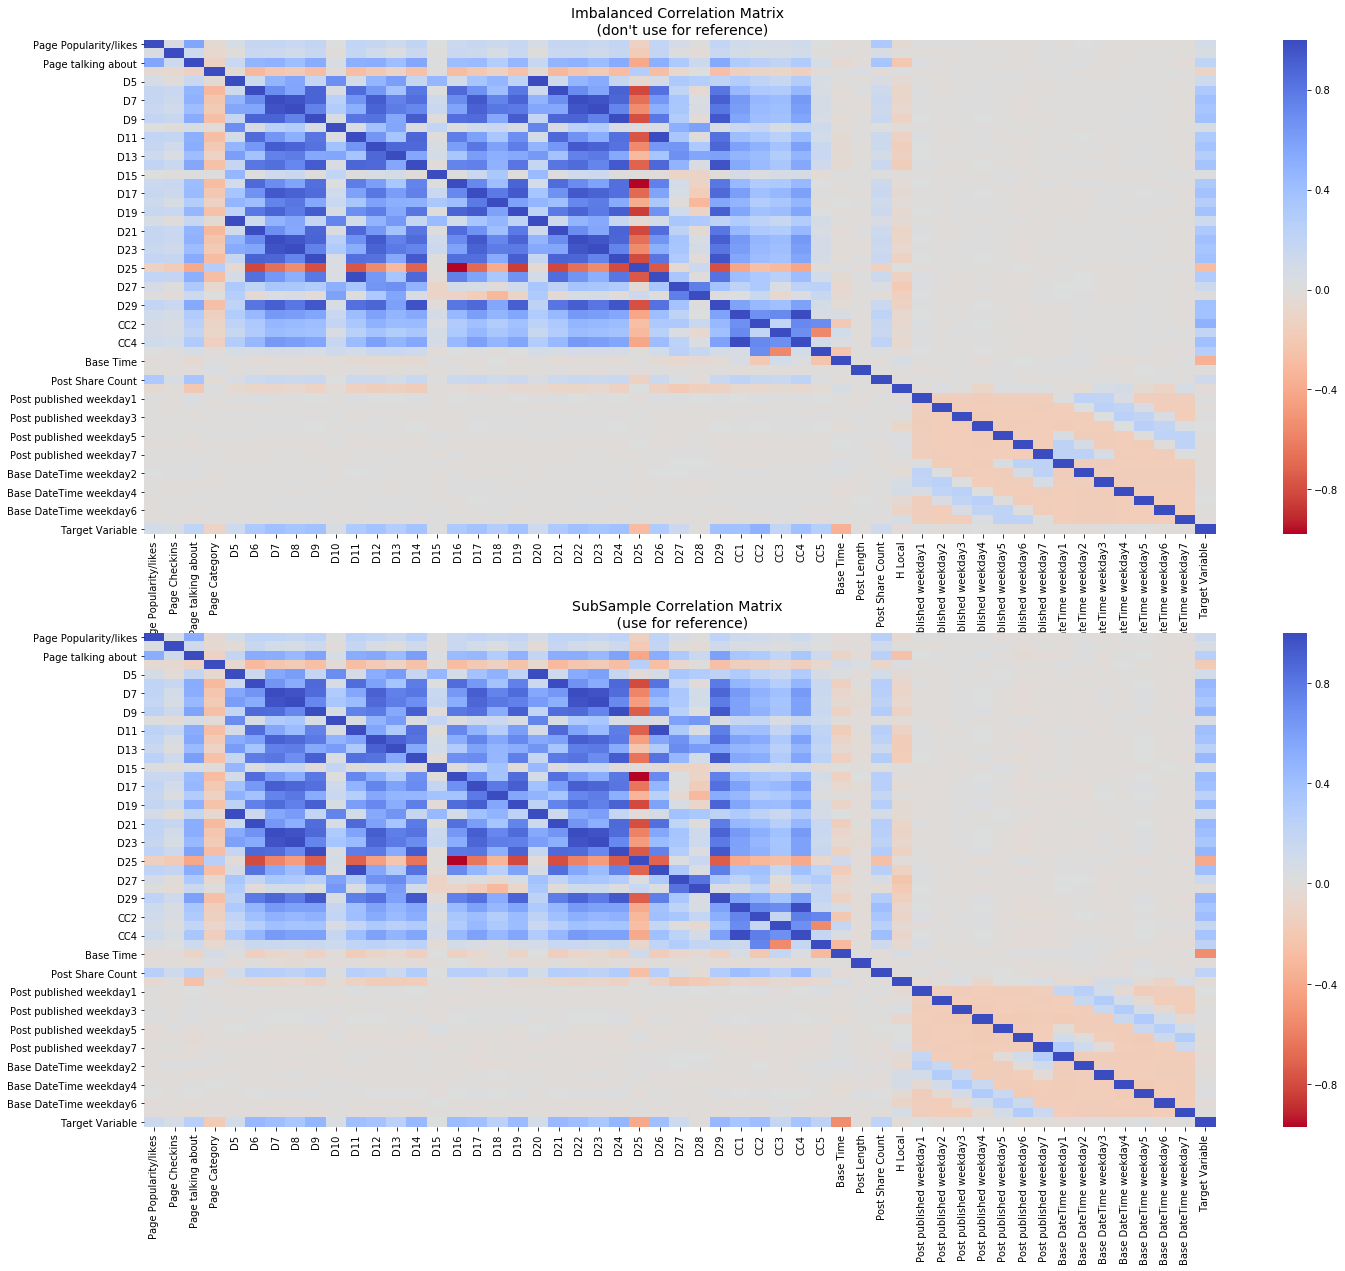

In [28]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

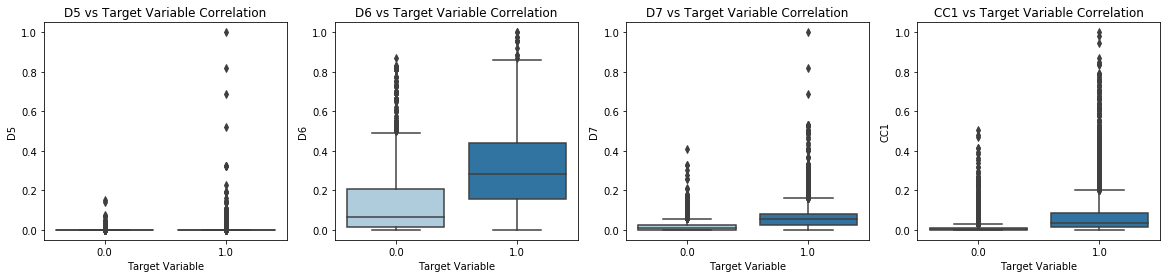

In [29]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Correlations with our Target Variable 
sns.boxplot(x="Target Variable", y="D5", data=new_df, palette="Paired", ax=axes[0])
axes[0].set_title('D5 vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="D6", data=new_df, palette="Paired", ax=axes[1])
axes[1].set_title('D6 vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="D7", data=new_df, palette="Paired", ax=axes[2])
axes[2].set_title('D7 vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="CC1", data=new_df, palette="Paired", ax=axes[3])
axes[3].set_title('CC1 vs Target Variable Correlation')



plt.show()

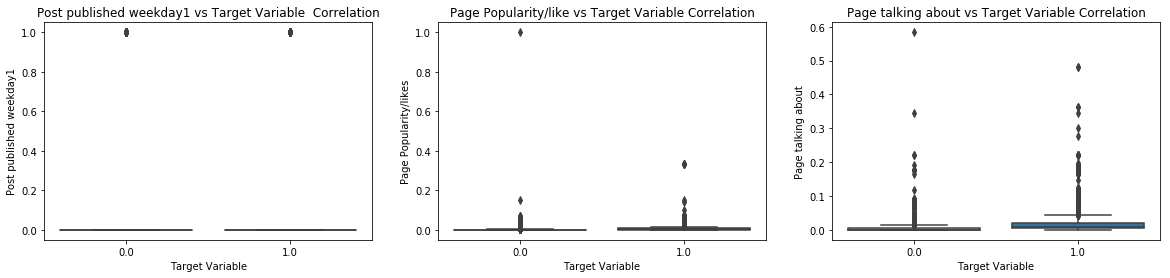

In [30]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Correlations with our Target Variable 

sns.boxplot(x="Target Variable", y="Post published weekday1", data=new_df, palette="Paired", ax=axes[0])
axes[0].set_title('Post published weekday1 vs Target Variable  Correlation')

sns.boxplot(x="Target Variable", y="Page Popularity/likes", data=new_df, palette="Paired", ax=axes[1])
axes[1].set_title('Page Popularity/like vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="Page talking about", data=new_df, palette="Paired", ax=axes[2])
axes[2].set_title('Page talking about vs Target Variable Correlation')


plt.show()

In [31]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Target Variable', axis=1)
y = new_df['Target Variable']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 1.2e+02 s


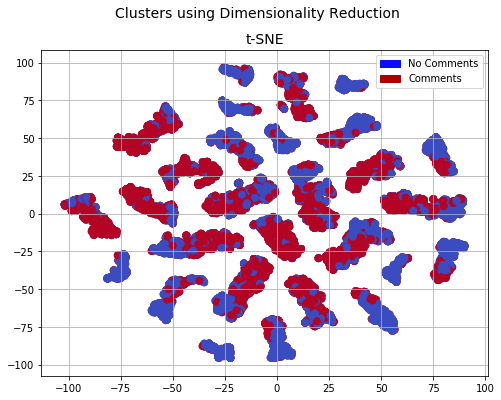

In [32]:
f, (ax1) = plt.subplots(1, figsize=(8,6))
labels = ['No Comments', 'Comments']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Comments')
red_patch = mpatches.Patch(color='#AF0000', label='Comments')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Comments', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Comments', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

In [33]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select best 10 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(new_df.iloc[:,0:52], new_df["Target Variable"])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False  True False False False
 False False False False  True False False False False  True False False
 False False False False False  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False]
[ 4  7 26 16 22  9  1  5  1 42 24  6 10 11 38 40  1  3  2 20 14  1  8 13
 18 41 43 19 17  1  1  1  1  1  1 23 15 12 30 27 29 21 31 32 28 36 34 33
 35 39 25 37]


In [34]:
# Splitting the data
train, test = train_test_split(new_df, train_size = 0.7, test_size = 0.3,random_state = 1,shuffle = False)

In [35]:
df = train
df_test = test

# Train Data

In [36]:
print('Train')
print ('count of 1: {:.0f}' .format(len(train[train['Target Variable'] == 1])))
print ('count of 0: {:.0f}' .format(len(train[train['Target Variable'] == 0])))
print('Test')
print ('count of 1: {:.0f}' .format(len(test[test['Target Variable'] == 1])))
print ('count of 0: {:.0f}' .format(len(test[test['Target Variable'] == 0])))

Train
count of 1: 3714
count of 0: 3644
Test
count of 1: 1542
count of 0: 1612


In [37]:
# Defining X variables
X= np.array([df.iloc[:,6],df.iloc[:,8],df.iloc[:,16],df.iloc[:,21],df.iloc[:,29],df.iloc[:,30],
             df.iloc[:,31],df.iloc[:,32],df.iloc[:,33],df.iloc[:,34]])
X = np.transpose(X)

In [38]:
# Defining dependent Target Variable
y = np.array(df['Target Variable'])

# Support Vector Machine 

In [39]:
# Run SVM only for train data
t0 = time.time()
linear_svm = SVC(kernel='linear', C=0.1, gamma=10).fit(X, y)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm = SVC(kernel='rbf', C=0.1, gamma=10).fit(X, y)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X, y)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4

Linear Model took 0.68 s
RBF Model took 0.64 s
RBF Model took 0.55 s


In [40]:
# Predicted Target Values
linear_pred = linear_svm.predict(X)
RBF_pred = RBF_svm.predict(X)
Poly_pred = Poly_svm.predict(X)

In [41]:
# Confusion Matrix for Linear Model
linear_cm = np.array(confusion_matrix(y,linear_pred))
linear_matrix = pd.DataFrame(linear_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
linear_matrix

,Actual Comments,Actual No comments
Predicted Comments,2838,806
Predicted No comments,251,3463


In [42]:
# Confusion Matrix for RBF Model
RBF_cm = np.array(confusion_matrix(y,RBF_pred))
RBF_matrix = pd.DataFrame(RBF_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
RBF_matrix

,Actual Comments,Actual No comments
Predicted Comments,3178,466
Predicted No comments,296,3418


In [43]:
# Confusion Matrix for Polynomial Model
Poly_cm = np.array(confusion_matrix(y,Poly_pred))
Poly_matrix = pd.DataFrame(Poly_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
Poly_matrix

,Actual Comments,Actual No comments
Predicted Comments,3220,424
Predicted No comments,245,3469


In [44]:
# Accuracy of three SVM Models
print("Linear Model accuracy: {:.3f}".format( accuracy_score(y,linear_pred)))
print("RBF Model accuracy: {:.3f}".format(accuracy_score(y,RBF_pred)))
print("Polynomial Model accuracy: {:.3f}".format(accuracy_score(y,Poly_pred)))

Linear Model accuracy: 0.856
RBF Model accuracy: 0.896
Polynomial Model accuracy: 0.909


In [45]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X, y)

# SVC best estimator
svc = grid_svc.best_estimator_


# Decision Tree

In [46]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))


# tree best estimator
tree_clf = grid_tree.best_estimator_

Decision Tree Model took 0.2 s


In [47]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred = tree_clf.predict(X)
DT_cm = np.array(confusion_matrix(y,Decision_Tree_pred))
DT_Conf_matrix = pd.DataFrame(DT_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
DT_Conf_matrix

,Actual Comments,Actual No comments
Predicted Comments,3392,252
Predicted No comments,360,3354


In [48]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y,Decision_Tree_pred)))

Decision Tree Accuracy on training set: 0.9168


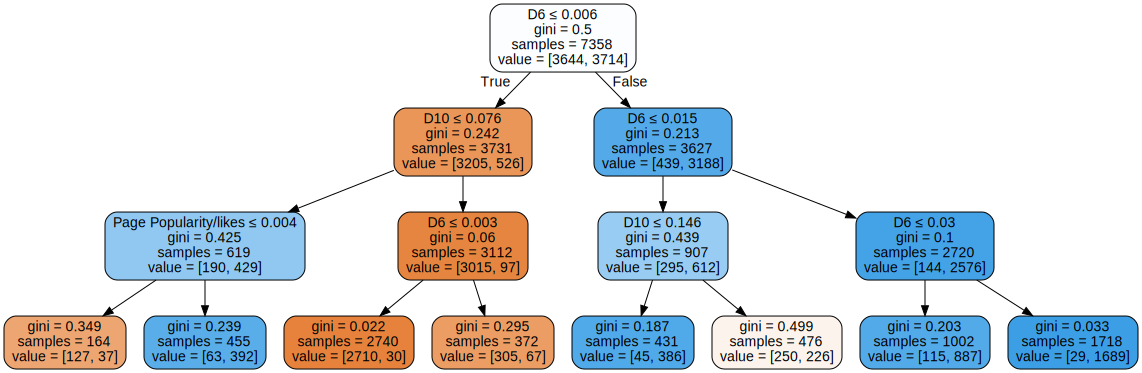

In [49]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                             feature_names=train.columns[:10],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

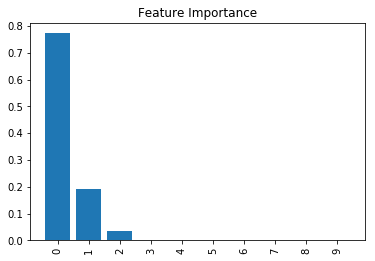

In [50]:
# Feature Importance
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), rotation=90)

# Show plot
plt.show()

# Boosted Decision Tree

In [51]:
# Boosted DecisionTree Classifier
XGboost_tree_params = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree = GridSearchCV(XGBClassifier(), XGboost_tree_params).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))


# tree best estimator
XGboost_tree_clf = XGboost_grid_tree.best_estimator_

print("XGboost Boosted Decision Tree Accuracy on training set: {:.3f}".format(XGboost_tree_clf.score(X, y)))

Decision Tree Model took 3.6 s
XGboost Boosted Decision Tree Accuracy on training set: 0.930


In [52]:
# Confusion Matrix for Decision Tree 
XGboost_Decision_Tree_pred = XGboost_tree_clf.predict(X)
XGboost_DT_cm = np.array(confusion_matrix(y,XGboost_Decision_Tree_pred))
XGboost_DT_Conf_matrix = pd.DataFrame(XGboost_DT_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
XGboost_DT_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,3302,342
Predicted No Fraud,173,3541


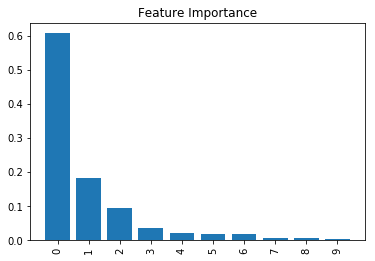

In [53]:
# Feature Importance
importances = XGboost_tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), rotation=90)

# Show plot
plt.show()

# KNN Classifier

In [54]:
# KNN Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

t2 = time.time()
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params).fit(X, y)
t3 = time.time()
print("KNN CLassifier Model took {:.2} s".format(t3 - t2))


# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print('Best features of KNN classifiers are:',knears_neighbors)

KNN CLassifier Model took 9.4 s
Best features of KNN classifiers are: KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [55]:
# Confusion Matrix for Decision Tree 
Knn_pred = knears_neighbors.predict(X)
Knn_cm = np.array(confusion_matrix(y,Knn_pred))
Knn_Conf_matrix = pd.DataFrame(Knn_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Knn_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,3417,227
Predicted No Fraud,185,3529


In [56]:
print('KNN Classifier Accuracy on training set:', round(accuracy_score(y,Knn_pred) * 100, 2).astype(str) + '%')

KNN Classifier Accuracy on training set: 94.4%


# Neural Networks

In [226]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}

In [227]:
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_size,int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X.shape[1],input_shape=(X.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="relu"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="relu"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X,y,batch_size=128,epochs=20,validation_split = 0.3,callbacks=[tensorboard])

2
Train on 5150 samples, validate on 2208 samples
Epoch 1/20
5150/5150 [==============================] - 2s 481us/sample - loss: 0.6637 - acc: 0.7837 - val_loss: 0.6227 - val_acc: 0.8247
Epoch 2/20
5150/5150 [==============================] - 0s 53us/sample - loss: 0.5638 - acc: 0.8414 - val_loss: 0.4777 - val_acc: 0.8469
Epoch 3/20
5150/5150 [==============================] - 0s 55us/sample - loss: 0.3972 - acc: 0.8548 - val_loss: 0.3250 - val_acc: 0.8732
Epoch 4/20
5150/5150 [==============================] - 0s 89us/sample - loss: 0.3068 - acc: 0.8742 - val_loss: 0.2928 - val_acc: 0.8822
Epoch 5/20
5150/5150 [==============================] - 0s 71us/sample - loss: 0.2886 - acc: 0.8827 - val_loss: 0.2838 - val_acc: 0.8872
Epoch 6/20
5150/5150 [==============================] - 0s 53us/sample - loss: 0.2790 - acc: 0.8885 - val_loss: 0.2781 - val_acc: 0.8918
Epoch 7/20
5150/5150 [==============================] - 0s 53us/sample - loss: 0.2744 - acc: 0.8926 - val_loss: 0.2753 - val_ac

In [228]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 10)                110       
_________________________________________________________________
Dense_layer-1 (Dense)        (None, 16)                176       
_________________________________________________________________
Dense_layer-2 (Dense)        (None, 8)                 136       
_________________________________________________________________
Output_layer (Dense)         (None, 2)                 18        
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [62]:
print('Neural Networks Accuracy on training set:', round(model.evaluate(X, y, batch_size=128)[1] * 100, 2).astype(str) + '%')

7358/7358 [==============================] - 0s 8us/sample - loss: 0.2448 - acc: 0.9089
Neural Networks Accuracy on training set: 90.89%


In [63]:
NN_pred = model.predict_classes(X)

In [64]:
# Confusion Matrix for Decision Tree 
NN_pred = model.predict_classes(X,batch_size=200, verbose=0)
NN_cm = confusion_matrix(y,NN_pred)
NN_Conf_matrix = pd.DataFrame(NN_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
NN_Conf_matrix

,Actual Fraud,Actual No Fraud
Predicted Fraud,3290,354
Predicted No Fraud,316,3398


# Test Data

In [65]:
# Defining X variables
X_test= np.array([df_test.iloc[:,6],df_test.iloc[:,8],df_test.iloc[:,16],df_test.iloc[:,21],df_test.iloc[:,29],df_test.iloc[:,30],
             df_test.iloc[:,31],df_test.iloc[:,32],df_test.iloc[:,33],df_test.iloc[:,34]])
X_test = np.transpose(X_test)

In [66]:
# Defining dependent Target Variable
y_test = np.array(df_test['Target Variable'])

# Support Vector Machine 


In [67]:
# Run Logistic Regressions only for train data
# Run SVM only for train data
t0 = time.time()
linear_svm_test = SVC(kernel='linear', C=0.1, gamma=10).fit(X_test, y_test)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm_test = SVC(kernel='rbf', C=0.1, gamma=10).fit(X_test, y_test)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm_test = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X_test,y_test)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4


Linear Model took 0.092 s
RBF Model took 0.11 s
RBF Model took 0.089 s


In [68]:
# Predicted Target Values
linear_pred_test = linear_svm_test.predict(X_test)
RBF_pred_test = RBF_svm_test.predict(X_test)
Poly_pred_test = Poly_svm_test.predict(X_test)

In [69]:
# Confusion Matrix for Linear Model
linear_cm_test = np.array(confusion_matrix(y_test,linear_pred_test))
linear_matrix_test = pd.DataFrame(linear_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
linear_matrix_test

,Actual Comments,Actual No comments
Predicted Comments,1215,397
Predicted No comments,125,1417


In [70]:
# Confusion Matrix for RBF Model
RBF_cm_test = np.array(confusion_matrix(y_test,RBF_pred_test))
RBF_matrix_test = pd.DataFrame(RBF_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
RBF_matrix_test

,Actual Comments,Actual No comments
Predicted Comments,1384,228
Predicted No comments,142,1400


In [71]:
# Confusion Matrix for Polynomial Model
Poly_cm_test = np.array(confusion_matrix(y_test,Poly_pred_test))
Poly_matrix_test = pd.DataFrame(Poly_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
Poly_matrix_test

,Actual Comments,Actual No comments
Predicted Comments,1409,203
Predicted No comments,111,1431


In [72]:
# Accuracy of three SVM Models
# Accuracy of three SVM Models
print("Linear Model accuracy: {:.3f}".format(accuracy_score(y_test,linear_pred_test)))
print("RBF Model accuracy: {:.3f}".format(accuracy_score(y_test,RBF_pred_test)))
print("Polynomial Model accuracy: {:.3f}".format(accuracy_score(y_test,Poly_pred_test)))

Linear Model accuracy: 0.834
RBF Model accuracy: 0.883
Polynomial Model accuracy: 0.900


In [73]:

svc_params_test = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc_test = GridSearchCV(SVC(), svc_params_test)
grid_svc_test.fit(X_test, y_test)

# SVC best estimator
svc_test = grid_svc.best_estimator_

# Decision Tree

In [74]:
# DecisionTree Classifier
tree_params_test = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree_test = GridSearchCV(DecisionTreeClassifier(), tree_params_test).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
tree_clf_test = grid_tree_test.best_estimator_

Decision Tree Model took 0.21 s


In [75]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred_test = tree_clf_test.predict(X_test)
DT_cm_test = np.array(confusion_matrix(y_test,Decision_Tree_pred_test))
DT_Conf_matrix_test = pd.DataFrame(DT_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
DT_Conf_matrix_test

,Actual Comments,Actual No comments
Predicted Comments,1487,125
Predicted No comments,148,1394


In [76]:
print("Decision Tree Accuracy on test set: {:.4f}".format(accuracy_score(y_test,Decision_Tree_pred_test)))

Decision Tree Accuracy on test set: 0.9134


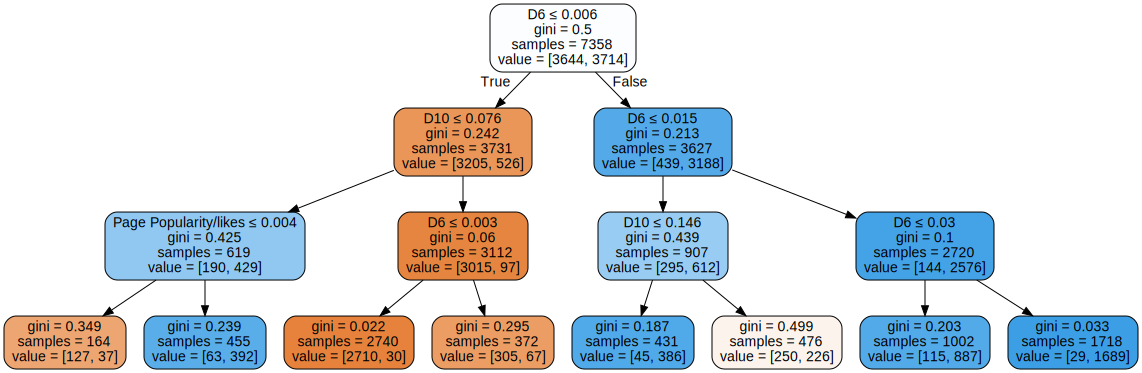

In [77]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf_test, out_file=None, 
                             feature_names=train.columns[:10],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

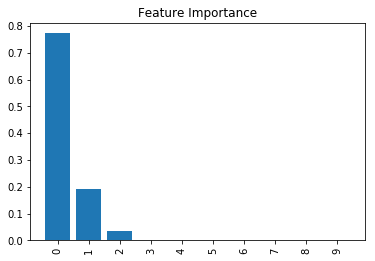

In [78]:
# Feature Importance
importances = tree_clf_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot
plt.show()

# Boosted Decision Tree

In [79]:
# Boosted DecisionTree Classifier
XGboost_tree_params_test = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree_test = GridSearchCV(XGBClassifier(), XGboost_tree_params_test).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
XGboost_tree_clf_test = XGboost_grid_tree_test.best_estimator_

Decision Tree Model took 3.7 s


In [80]:
# Confusion Matrix for Decision Tree 
XGboost_Decision_Tree_pred_test = XGboost_tree_clf_test.predict(X_test)
XGboost_DT_cm_test = np.array(confusion_matrix(y_test,XGboost_Decision_Tree_pred_test))
XGboost_DT_Conf_matrix_test = pd.DataFrame(XGboost_DT_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
XGboost_DT_Conf_matrix_test

,Actual Comments,Actual No comments
Predicted Comments,1438,174
Predicted No comments,78,1464


In [81]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,XGboost_Decision_Tree_pred_test)))

Decision Tree Accuracy on training set: 0.9201


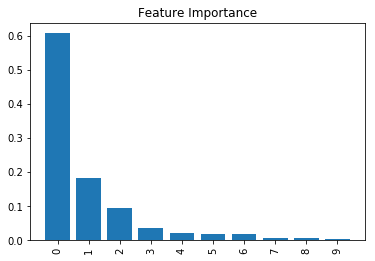

In [82]:
# Feature Importance
importances = XGboost_tree_clf_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot
plt.show()

# KNN

In [83]:
# DecisionTree Classifier
knears_params_test = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

t2 = time.time()
grid_knears_test = GridSearchCV(KNeighborsClassifier(), knears_params_test).fit(X_test, y_test)
t3 = time.time()
print("KNN CLassifier Model took {:.2} s".format(t3 - t2))


# KNears best estimator
knears_neighbors_test = grid_knears_test.best_estimator_
print('Best features of KNN classifiers are:',knears_neighbors_test)

KNN CLassifier Model took 1.9 s
Best features of KNN classifiers are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')


In [84]:
# Confusion Matrix for Decision Tree 
Knn_pred_test = knears_neighbors.predict(X_test)
Knn_cm_test = np.array(confusion_matrix(y_test,Knn_pred_test))
Knn_Conf_matrix_test = pd.DataFrame(Knn_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Knn_Conf_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,1437,175
Predicted No Fraud,135,1407


In [85]:
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred_test) * 100, 2).astype(str) + '%')

KNN Classifier Accuracy on test set: 90.17%


# Neural Networks

In [229]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}

In [230]:
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_size,int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X.shape[1],input_shape=(X.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="relu"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="relu"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'FCV Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs/{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_test,y_test,batch_size=128,epochs=20,validation_split = 0.3,callbacks=[tensorboard])

Train on 2207 samples, validate on 947 samples
Epoch 1/20
2207/2207 [==============================] - 1s 642us/sample - loss: 0.6860 - acc: 0.5664 - val_loss: 0.6718 - val_acc: 0.5692
Epoch 2/20
2207/2207 [==============================] - 0s 57us/sample - loss: 0.6641 - acc: 0.5609 - val_loss: 0.6497 - val_acc: 0.5776
Epoch 3/20
2207/2207 [==============================] - 0s 43us/sample - loss: 0.6424 - acc: 0.6112 - val_loss: 0.6238 - val_acc: 0.6748
Epoch 4/20
2207/2207 [==============================] - 0s 33us/sample - loss: 0.6152 - acc: 0.7059 - val_loss: 0.5910 - val_acc: 0.7666
Epoch 5/20
2207/2207 [==============================] - 0s 42us/sample - loss: 0.5817 - acc: 0.7780 - val_loss: 0.5539 - val_acc: 0.8173
Epoch 6/20
2207/2207 [==============================] - 0s 51us/sample - loss: 0.5450 - acc: 0.8314 - val_loss: 0.5152 - val_acc: 0.8427
Epoch 7/20
2207/2207 [==============================] - 0s 61us/sample - loss: 0.5071 - acc: 0.8478 - val_loss: 0.4760 - val_acc: 

2207/2207 [==============================] - 0s 35us/sample - loss: 0.2925 - acc: 0.8786 - val_loss: 0.2763 - val_acc: 0.8912
Epoch 20/20
2207/2207 [==============================] - 0s 44us/sample - loss: 0.2842 - acc: 0.8831 - val_loss: 0.2753 - val_acc: 0.8891
Train on 2207 samples, validate on 947 samples
Epoch 1/20
2207/2207 [==============================] - 2s 815us/sample - loss: 0.6790 - acc: 0.8029 - val_loss: 0.6623 - val_acc: 0.8321
Epoch 2/20
2207/2207 [==============================] - 0s 76us/sample - loss: 0.6448 - acc: 0.8355 - val_loss: 0.6139 - val_acc: 0.8490
Epoch 3/20
2207/2207 [==============================] - 0s 41us/sample - loss: 0.5816 - acc: 0.8364 - val_loss: 0.5297 - val_acc: 0.8405
Epoch 4/20
2207/2207 [==============================] - 0s 39us/sample - loss: 0.4847 - acc: 0.8405 - val_loss: 0.4190 - val_acc: 0.8416
Epoch 5/20
2207/2207 [==============================] - 0s 71us/sample - loss: 0.3847 - acc: 0.8441 - val_loss: 0.3335 - val_acc: 0.8585
Epo

2207/2207 [==============================] - 0s 55us/sample - loss: 0.2779 - acc: 0.8831 - val_loss: 0.2822 - val_acc: 0.8786
Epoch 18/20
2207/2207 [==============================] - 0s 54us/sample - loss: 0.2795 - acc: 0.8845 - val_loss: 0.2859 - val_acc: 0.8754
Epoch 19/20
2207/2207 [==============================] - 0s 56us/sample - loss: 0.2793 - acc: 0.8849 - val_loss: 0.2629 - val_acc: 0.8976
Epoch 20/20
2207/2207 [==============================] - 0s 57us/sample - loss: 0.2711 - acc: 0.8872 - val_loss: 0.2613 - val_acc: 0.8923


In [231]:
print('Neural Networks Accuracy on training set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

3154/3154 [==============================] - 0s 29us/sample - loss: 0.2673 - acc: 0.8922
Neural Networks Accuracy on training set: 89.22%


In [90]:
NN_pred_test = model.predict_classes(X_test)

In [91]:
# Confusion Matrix for Decision Tree 
NN_pred_test = model.predict_classes(X_test,batch_size=200, verbose=0)
NN_cm_test = confusion_matrix(y_test,NN_pred_test)
NN_Conf_matrix_test = pd.DataFrame(NN_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
NN_Conf_matrix_test

,Actual Fraud,Actual No Fraud
Predicted Fraud,1396,216
Predicted No Fraud,125,1417


# Learning Curves

# Train Data

[Text(0, 0.5, ''), Text(0, 1.5, '')]

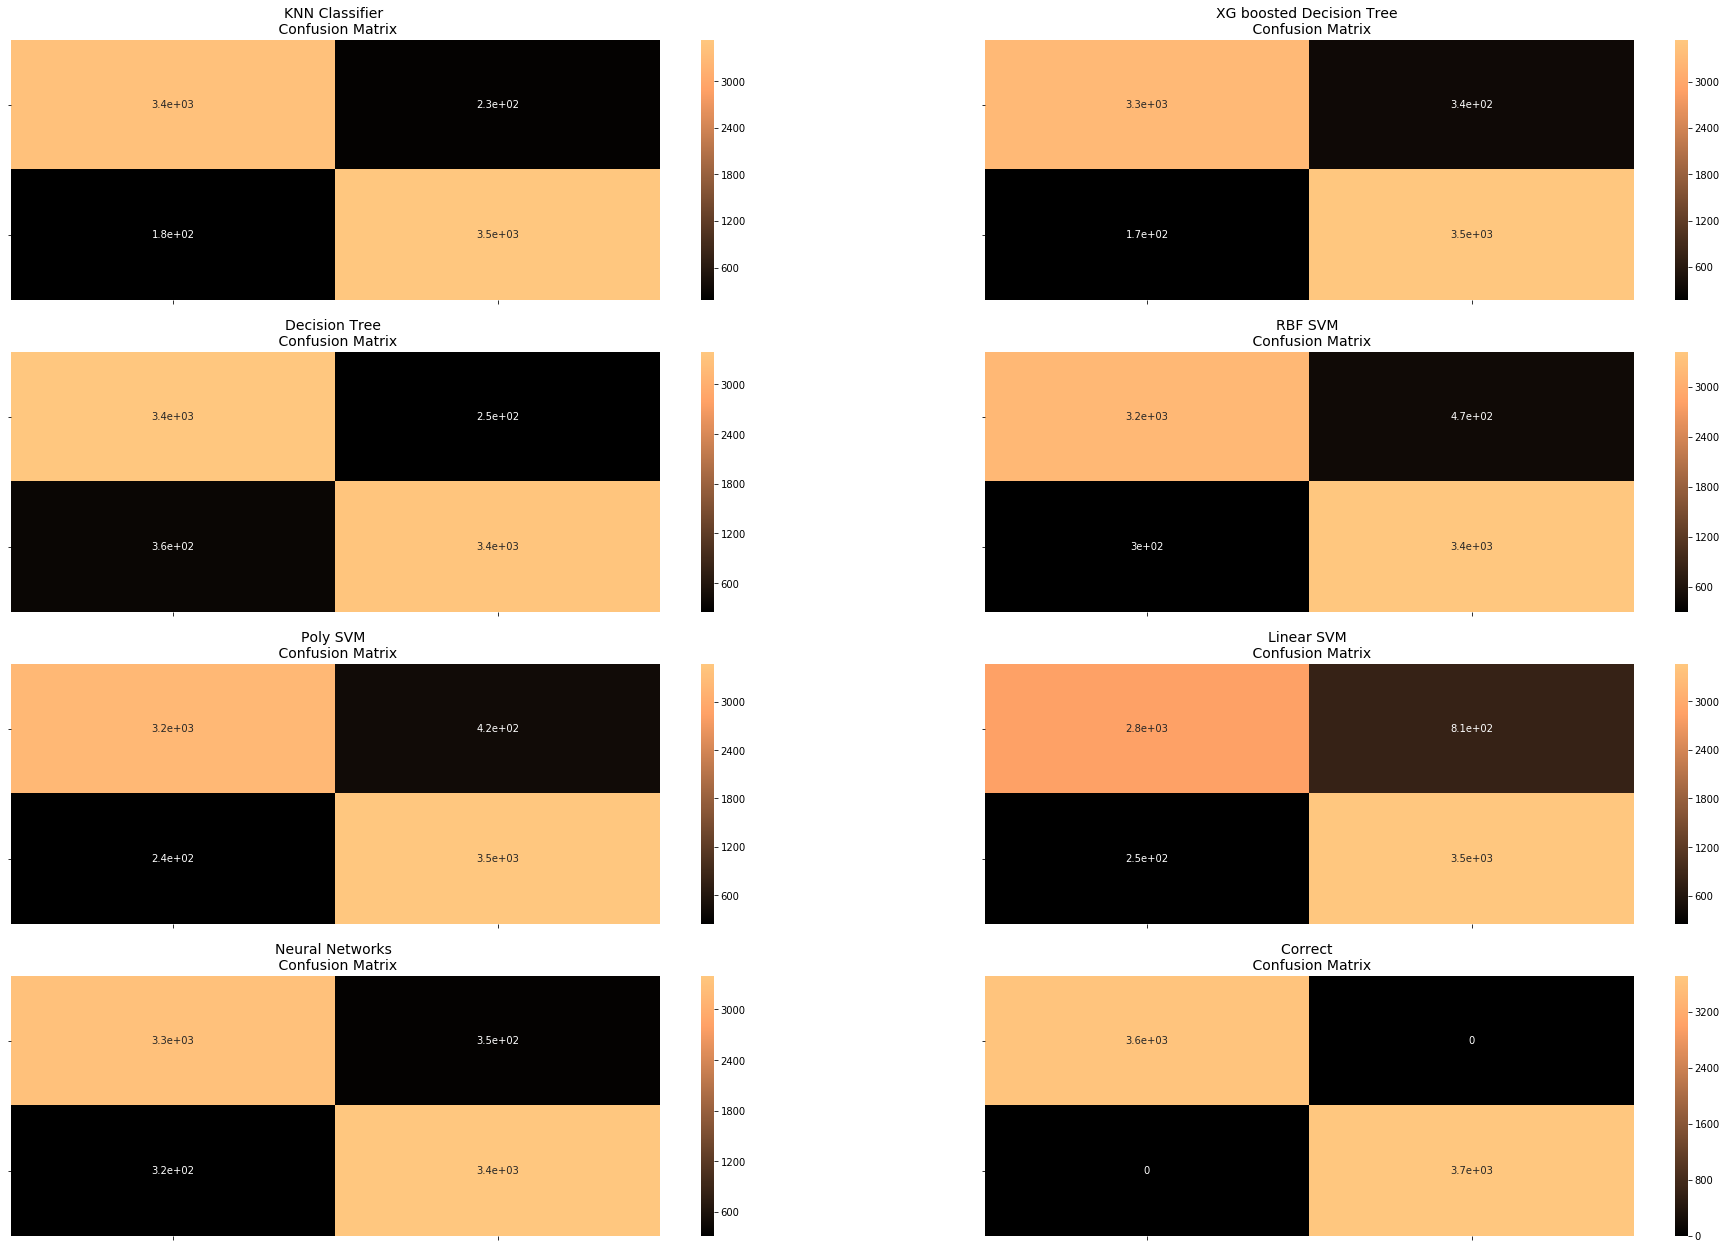

In [92]:
fig, ax = plt.subplots(4, 2,figsize=(32,22))


sns.heatmap(Knn_Conf_matrix, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("KNN Classifier \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(XGboost_DT_Conf_matrix, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0, 1].set_title("XG boosted Decision Tree \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(DT_Conf_matrix, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1, 0].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(RBF_matrix, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1, 1].set_title("RBF SVM \n Confusion Matrix", fontsize=14)
ax[1, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(Poly_matrix, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2, 0].set_title("Poly SVM \n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(linear_matrix, ax=ax[2][1], annot=True, cmap=plt.cm.copper)
ax[2, 1].set_title("Linear SVM \n Confusion Matrix", fontsize=14)
ax[2, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(NN_Conf_matrix, ax=ax[3][0], annot=True, cmap=plt.cm.copper)
ax[3, 0].set_title("Neural Networks \n Confusion Matrix", fontsize=14)
ax[3, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(confusion_matrix(y,y), ax=ax[3][1], annot=True, cmap=plt.cm.copper)
ax[3, 1].set_title("Correct \n Confusion Matrix", fontsize=14)
ax[3, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [93]:
# Overfitting Case

svc_score = cross_val_score(svc, X, y, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X, y, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score = cross_val_score(XGboost_tree_clf, X, y, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X, y, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')


Support Vector Classifier Cross Validation Score 88.11%
DecisionTree Classifier Cross Validation Score 91.15%
XGboost_tree_score DecisionTree Classifier Cross Validation Score 92.77%
Knears Neighbors Cross Validation Score 90.8%


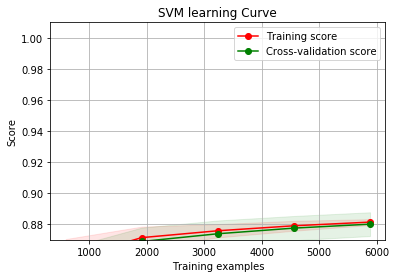

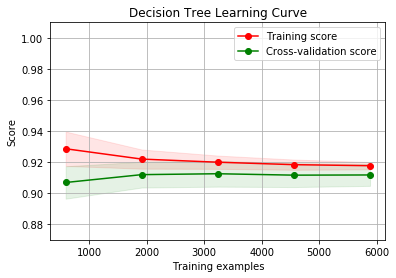

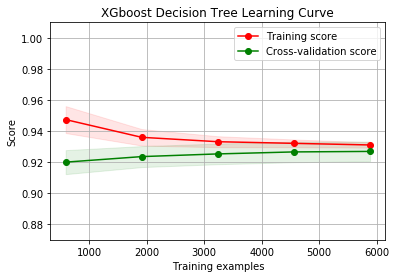

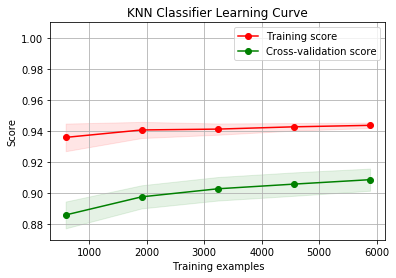

In [94]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(svc, 'SVM learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(tree_clf,'Decision Tree Learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(XGboost_tree_clf,'XGboost Decision Tree Learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(knears_neighbors,'KNN Classifier Learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

In [95]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc, X, y, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X, y, cv=5)

XGboost_tree_pred = cross_val_predict(XGboost_tree_clf, X, y, cv=5)

Knn_pred = cross_val_predict(knears_neighbors, X, y, cv=5)

In [96]:
print('Support Vector Classifier: ', round(roc_auc_score(y, svc_pred) * 100, 2).astype(str) + '%')
print('Decision Tree Classifier: ', round(roc_auc_score(y, tree_pred)* 100, 2).astype(str) + '%')
print('XGboost Decision Tree Classifier: ', round(roc_auc_score(y, XGboost_tree_pred)* 100, 2).astype(str) + '%')
print('KNN Classifier: ', round(roc_auc_score(y, Knn_pred)* 100, 2).astype(str) + '%')
print('Neural Network Classifier: ', round(roc_auc_score(y, NN_pred)* 100, 2).astype(str) + '%')

Support Vector Classifier:  95.58%
Decision Tree Classifier:  91.16%
XGboost Decision Tree Classifier:  92.75%
KNN Classifier:  90.8%
Neural Network Classifier:  90.89%


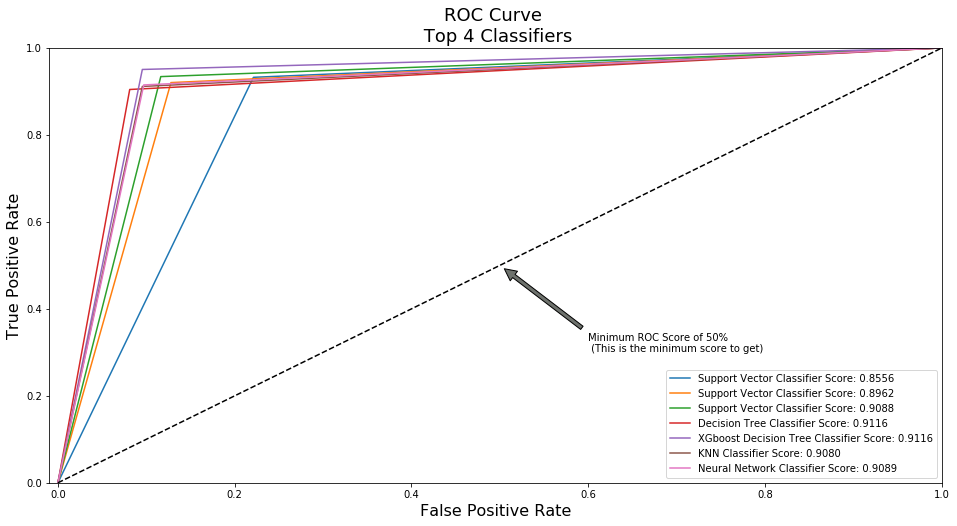

In [97]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y, XGboost_tree_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y, tree_pred)
Knn_fpr, Knn_tpr, Knn_threshold = roc_curve(y, Knn_pred)
l_svc_fpr, l_svc_tpr, l_svc_threshold = roc_curve(y, linear_pred)
r_svc_fpr, r_svc_tpr, r_svc_threshold = roc_curve(y, RBF_pred)
p_svc_fpr, p_svc_tpr, p_svc_threshold = roc_curve(y, Poly_pred)
NN_fpr, NN_tpr, NN_threshold = roc_curve(y, NN_pred)
    
graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr)
plt.show()

# Test Data

[Text(0, 0.5, ''), Text(0, 1.5, '')]

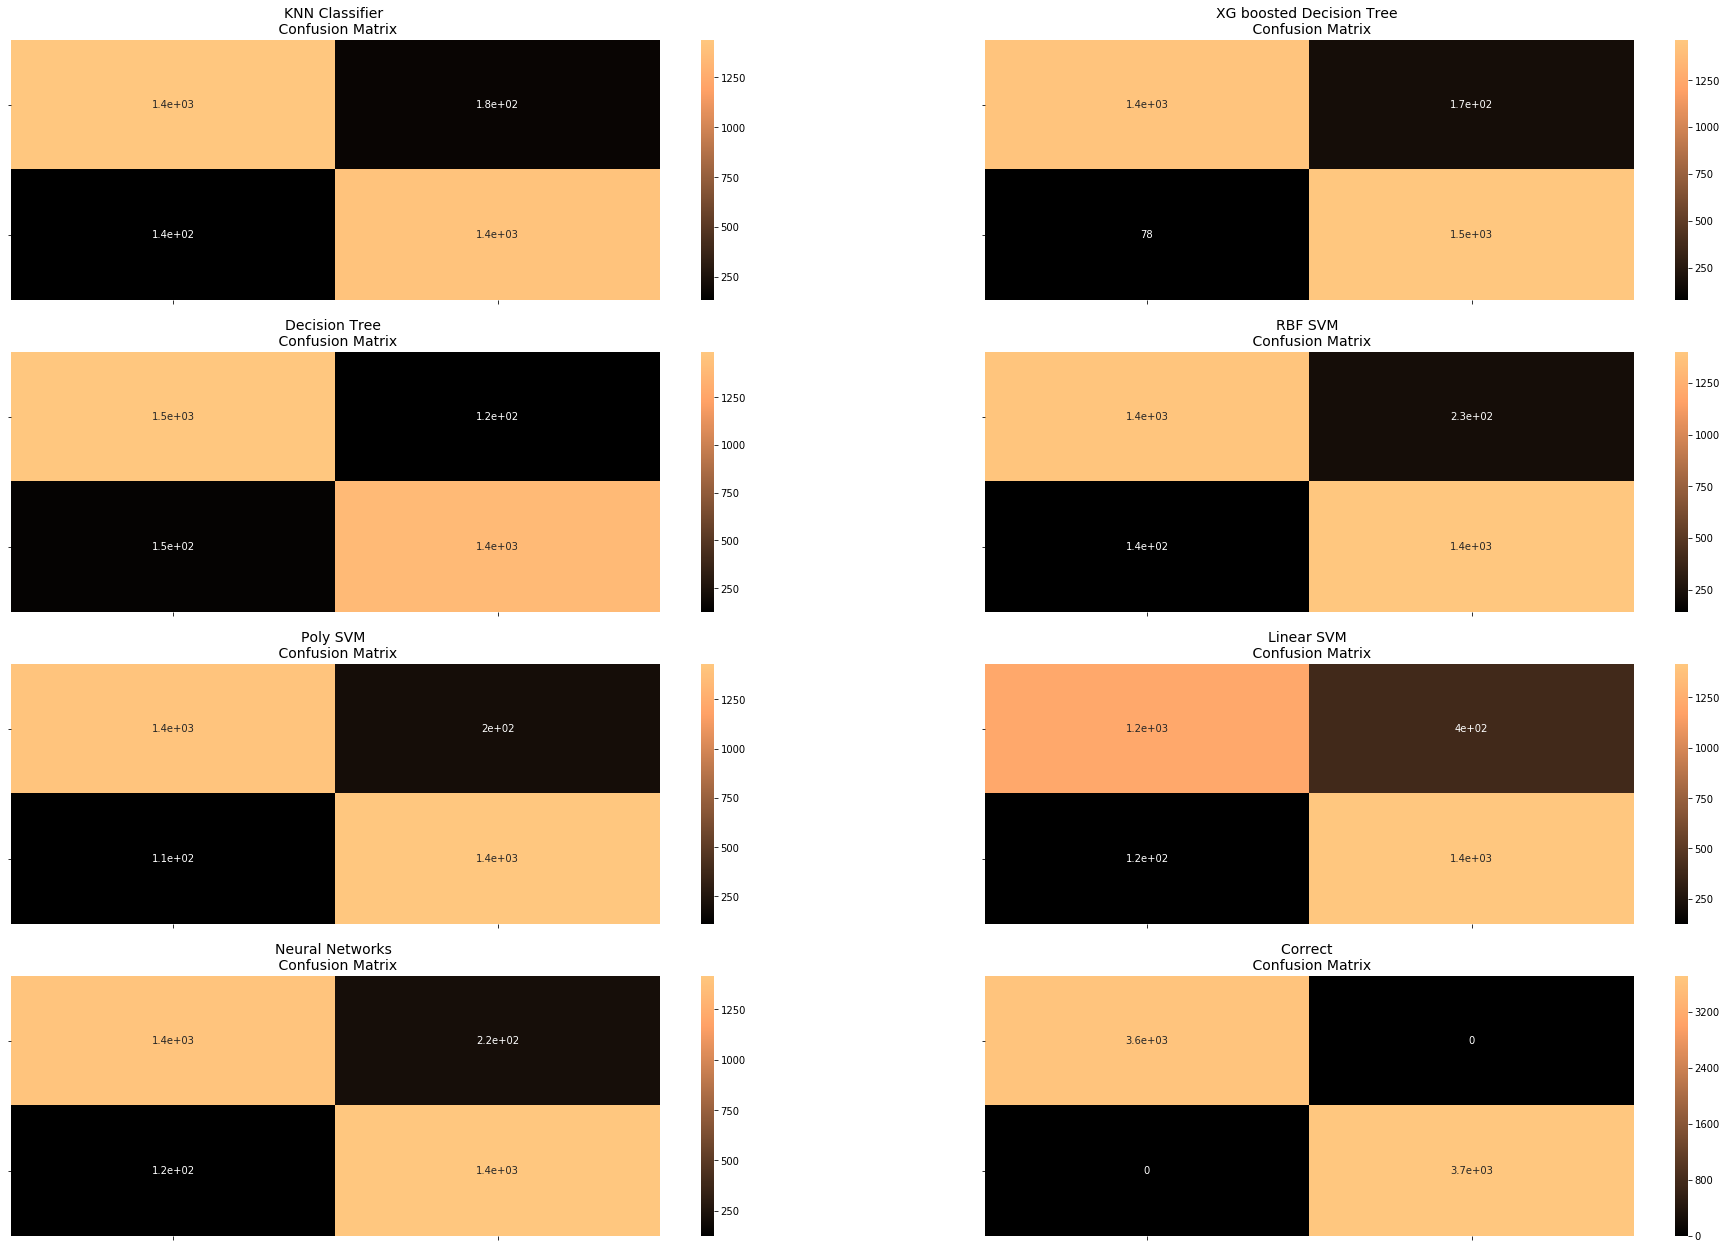

In [98]:
fig, ax = plt.subplots(4, 2,figsize=(32,22))


sns.heatmap(Knn_Conf_matrix_test, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("KNN Classifier \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(XGboost_DT_Conf_matrix_test, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0, 1].set_title("XG boosted Decision Tree \n Confusion Matrix", fontsize=14)
ax[0, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(DT_Conf_matrix_test, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1, 0].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[1, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(RBF_matrix_test, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1, 1].set_title("RBF SVM \n Confusion Matrix", fontsize=14)
ax[1, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(Poly_matrix_test, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2, 0].set_title("Poly SVM \n Confusion Matrix", fontsize=14)
ax[2, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(linear_matrix_test, ax=ax[2][1], annot=True, cmap=plt.cm.copper)
ax[2, 1].set_title("Linear SVM \n Confusion Matrix", fontsize=14)
ax[2, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(NN_Conf_matrix_test, ax=ax[3][0], annot=True, cmap=plt.cm.copper)
ax[3, 0].set_title("Neural Networks \n Confusion Matrix", fontsize=14)
ax[3, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(confusion_matrix(y,y), ax=ax[3][1], annot=True, cmap=plt.cm.copper)
ax[3, 1].set_title("Correct \n Confusion Matrix", fontsize=14)
ax[3, 1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[3, 1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [99]:
print('POLY Support Vector Classifier: ', round(roc_auc_score(y_test, Poly_pred_test)* 100, 2).astype(str) + '%')
print('Decision Tree Classifier: ', round(roc_auc_score(y_test, Decision_Tree_pred_test)* 100, 2).astype(str) + '%')
print('XGboost Decision Tree Classifier: ', round(roc_auc_score(y_test, XGboost_Decision_Tree_pred_test)* 100, 2).astype(str) + '%')
print('KNN Classifier Classifier: ',round(roc_auc_score(y_test, Knn_pred_test)* 100, 2).astype(str) + '%')
print('Neural Network Classifier: ', round(roc_auc_score(y_test, NN_pred_test)* 100, 2).astype(str) + '%')

POLY Support Vector Classifier:  90.1%
Decision Tree Classifier:  91.32%
XGboost Decision Tree Classifier:  92.07%
KNN Classifier Classifier:  90.19%
Neural Network Classifier:  89.25%


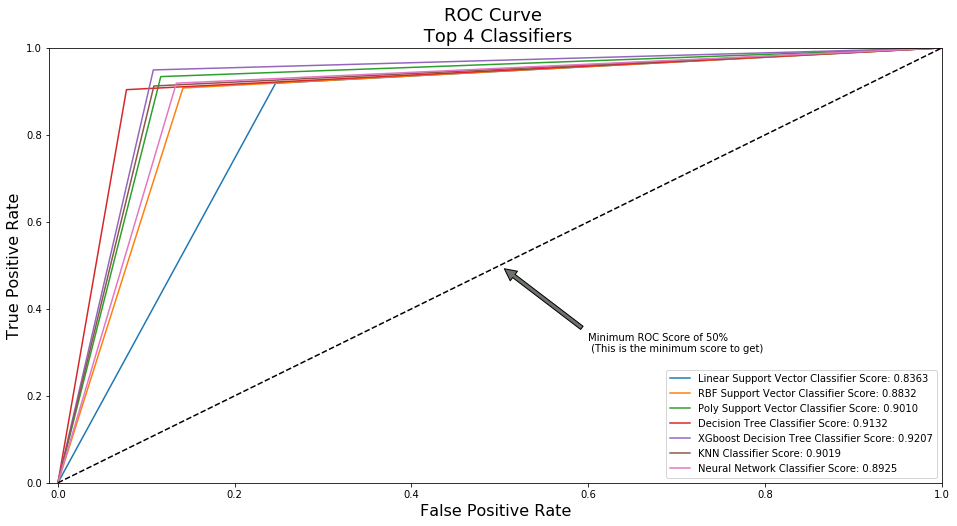

In [100]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test, XGboost_Decision_Tree_pred_test)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, Decision_Tree_pred_test)
Knn_fpr, Knn_tpr, Knn_threshold = roc_curve(y_test, Knn_pred_test)
l_svc_fpr, l_svc_tpr, l_svc_threshold = roc_curve(y_test, linear_pred_test)
r_svc_fpr, r_svc_tpr, r_svc_threshold = roc_curve(y_test, RBF_pred_test)
NN_fpr, NN_tpr, NN_threshold = roc_curve(y_test, NN_pred_test)
    
graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, l_svc_fpr, l_svc_tpr,r_svc_fpr, r_svc_tpr,
                           p_svc_fpr, p_svc_tpr, tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr)
plt.show()

# Test and Train Error Learning Curves

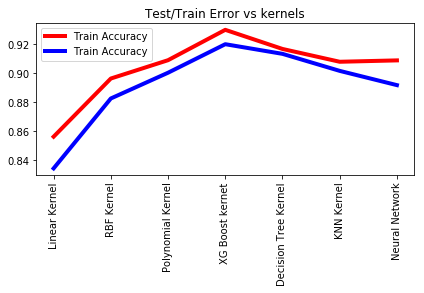

In [101]:
# Kernel Learning Curve
k = ["Linear Kernel","RBF Kernel","Polynomial Kernel","XG Boost kernet","Decision Tree Kernel",
     "KNN Kernel","Neural Network"]
Train_error = [accuracy_score(y,linear_pred),accuracy_score(y,RBF_pred),
               accuracy_score(y,Poly_pred),accuracy_score(y, XGboost_Decision_Tree_pred),
               accuracy_score(y, Decision_Tree_pred),accuracy_score(y, Knn_pred),accuracy_score(y, NN_pred)]

Test_error = [accuracy_score(y_test,linear_pred_test),accuracy_score(y_test,RBF_pred_test),
               accuracy_score(y_test,Poly_pred_test),accuracy_score(y_test, XGboost_Decision_Tree_pred_test),
               accuracy_score(y_test, Decision_Tree_pred_test),accuracy_score(y_test, Knn_pred_test),
               accuracy_score(y_test, NN_pred_test)]

plt.plot(k,Train_error,marker = '',color='red',linewidth=4,label='Train Accuracy')
plt.plot(k,Test_error,marker = '',color='blue',linewidth=4,label='Train Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Test/Train Error vs kernels")
plt.legend()